In [1]:
# Импортируем все необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import ttest_ind

## 1. Загрузка данных

**1.1 Прочитаем файл "games.csv" и сохраним его в переменную df**

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except FileNotFoundError:
    df = pd.read_csv(r"C:\Users\Тадевос\Tadevos\USER\Desktop\Курсы\Модуль 1\Датасеты к проектам\Проект 5 «Сборный проект»\games.csv")

**1.2 Выведем первые строки набора данных и изучим общую информацию о датафрейме**

In [3]:
# Выводим первые 5 строк датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Выводим общую информацию датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы по первому шагу:**

Была изучена общая информация о датафрейме, изначальные данные представлены в виде таблицы с 16715 строками и 11 столбцами. Каждая строка соответствует отдельной игре, а каждый столбец содержит информацию о ее характеристиках:

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Столбцы имеют различные типы данных. Столбцы Name, Platform, Genre, User_Score и Rating содержат данные типа object (строки), а остальные столбцы содержат данные типа float64 (числа с плавающей точкой).

# 2. Предобработка данных

**2.1 Приведём названия столбцов к нижнему регистру**

In [5]:
# Присвоим каждому столбцу 'df' значение, полученное из приведения каждого столбца к нижнему регистру
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**2.2 Преобразуем данные в нужные типы**

In [6]:
# Рассмотрим типы данных в датафрейме
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

**Преобразование типов данных:**
1) Столбец "year_of_release" следует преобразовать в тип данных "int", так как год выпуска игры является целым числом, перед тем как преобразовать данные необходимо заполнить или удалить пустые значения из столбца (в нашем случае удаляем пустые значения так как их очень мало - 2%), потому что NaN это float тип и если в столбце будет NaN, то в int преобразовать не получится.

2) Столбцы "na_sales", "eu_sales", "jp_sales" и "other_sales" следует оставить в типе данных "float", так как значения продаж могут быть вещественными числами.

3) Столбец "critic_score" следует оставить в типе данных "float", так как оценка критиков может быть вещественным числом.

4) Столбец "user_score" следует преобразовать в тип данных "float", так как оценка пользователей является числом, перед тем как преобразовать данные заменяем значения 'tbd' на NaN в столбце "user_score", потому что все значения данного столбца должны быть числовыми, а 'tbd' - это строка (TBD означает "To Be Determined"- т.е., оценка будет определена позже.).

5) Столбец "rating" следует оставить в типе данных "object", так как рейтинг представлен строковыми значениями.

In [7]:
# Посчитаем сумму пропусков столбца "year_of_release"
df["year_of_release"].isna().sum()

269

In [8]:
# Удаляем пустые значения из столбца "year_of_release"
df.dropna(subset=["year_of_release"], inplace=True)
# Сбросим индекс датафрейма после удаления строк
df = df.reset_index(drop=True)

In [9]:
# ПРоверим удалились ли пропуски
df["year_of_release"].isna().sum()

0

In [10]:
# Изменяем тип данных столбца "year_of_release" на int
df["year_of_release"] = df["year_of_release"].astype(int)

In [11]:
# Заменяем значения 'tbd' на NaN в столбце "user_score"
df["user_score"].replace('tbd', np.nan, inplace=True)
# Изменяем тип данных столбца "user_score" на float
df["user_score"] = df["user_score"].astype(float)

In [12]:
# Проверим изменились ли типы данных столбцов
df.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

**2.3 Обработаем пропуски в данных**

In [13]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


**Данные содержат пропущенные значения в столбцах critic_score - 51%, user_score - 55% и rating - 41%.**

Для заполнения пропусков в столбце critic_score можно воспользоваться различными методами, например, медианой или средним значением оценок критиков. Это можно сделать, поскольку оценка критиков зависит от профессиональных мнений и их средний показатель даст представление о степени успеха или качества игры. 

Что касается пропусков в столбце user_score, то заполнение их средним или медианным значением не является адекватным решением, поскольку это может исказить общую картину исследования. Оценки пользователей являются субъективной информацией и могут сильно различаться, поэтому более надежным подходом будет оставить пропущенные значения без заполнения.

Столбец rating представляет собой категориальную переменную, поэтому пропуски можно заполнить наиболее часто встречающимся значением, таким как "Unknown" или "Not Rated", если таковые имеются.

Причины возникновения пропусков могут быть различными. Например, отсутствие оценок критиков или пользователей может быть связано с ограниченным доступом к информации, или игра может быть еще не оценена. Также, некоторые игры могут быть выпущены в странах, которые не подвергаются рейтинговой системе ESRB.

In [14]:
df["critic_score"].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [15]:
# Заполняем пропущенные значения в столбце 'rating' значением 'unknown'
df["rating"].fillna("unknown", inplace=True)

In [16]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


**2.4 Добавление в датафрейм нового столбца с суммарными продажами во всех регионах**

In [17]:
df["total_sales"] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


**Выводы по второму шагу:**

Во втором шаге были выполнены следующие задачи: 
- названия столбцов приведены к нижнему регистру;
- преобразованы данные в нужные типы, а именно "year_of_release" в int и "user_score" в float;
- обработаны пропуски в данных;
- создание нового столбца *total_sales*, в котором хранится информация суммарные продажи во всех регионах.

# 3. Исследоовательский анализ данных

**3.1 Рассмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

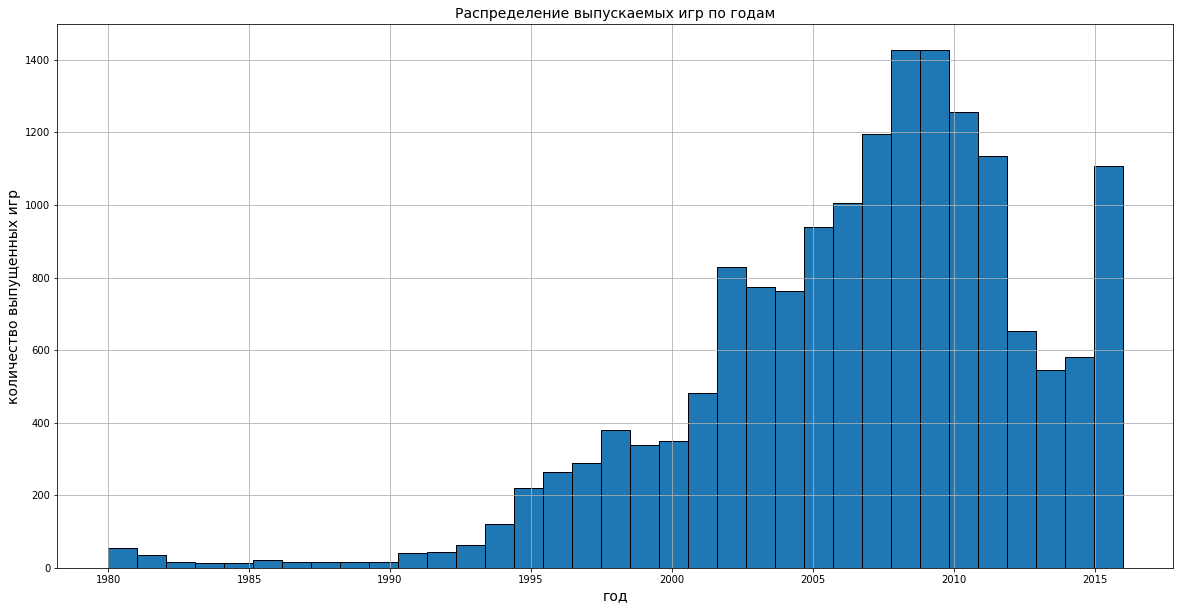

In [18]:
plt.figure(figsize=(20, 10))
plt.hist(df["year_of_release"], bins=35, edgecolor='black')
plt.xlabel("год", fontsize=14)
plt.ylabel("количество выпущенных игр", fontsize=14)
plt.title("Распределение выпускаемых игр по годам", fontsize=14)
plt.grid(True)
plt.show()

**Вывод:**

Данные за все периоды важны, чтобы увидеть тренды и изменения в количестве выпускаемых игр со временем. Например, можно заметить, что в начале 2000-х годов количество выпускаемых игр значительно увеличилось и достигло пика в 2008-2009 гг. После этого, количество игр постепенно снижалось. Это может быть связано с изменениями в игровой индустрии, изменением потребностей и предпочтений игроков, а также с техническими и финансовыми ограничениями. Кроме того, данные за периоды с 1980 по 2000 годы могут помочь понять, как менялся рынок видеоигр с его становления. Таким образом, данные за все периоды имеют важное значение для анализа и понимания динамики игровой индустрии.

**3.2 Рассмотрим, как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [19]:
# Создаём новую переменную с наибольшими суммарными продажами
top_platforms = df["platform"].value_counts().head(10)
top_platforms

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
Name: platform, dtype: int64

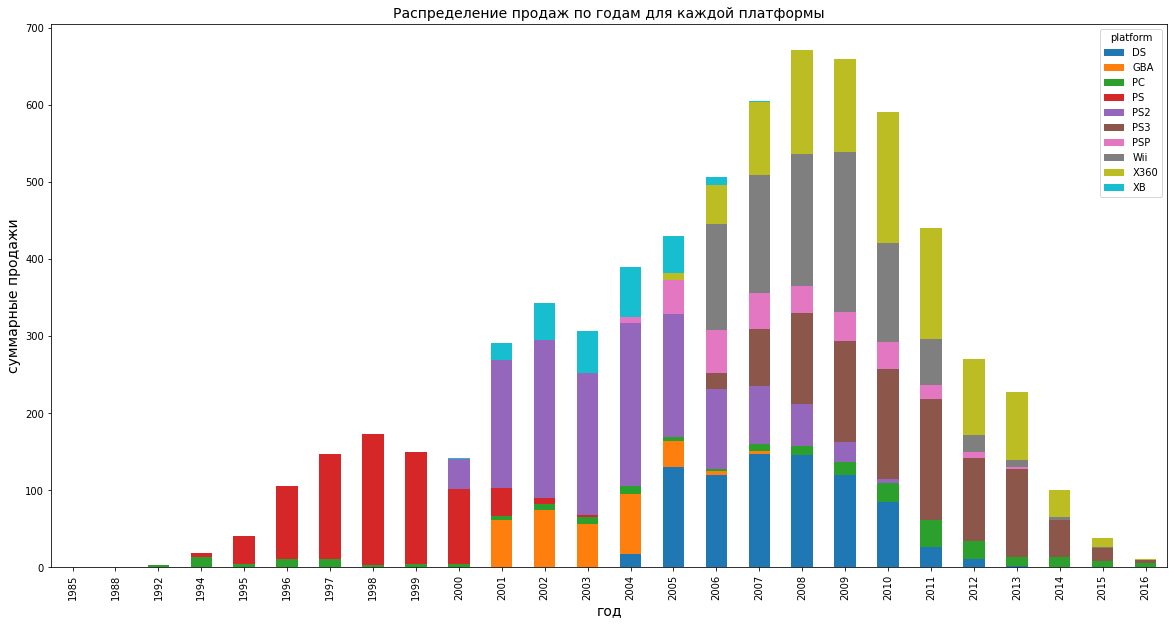

In [20]:
# Отфильтруем данные только для выбранных платформ
selected_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'GBA', 'XB']
filtered_data = df[df['platform'].isin(selected_platforms)]

# Посчитаем суммарные продажи по годам
sales_by_year = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Построим гистограмму
sales_by_year.plot(kind='bar', stacked=True, figsize=(20,10))
plt.xlabel('год', fontsize=14)
plt.ylabel('суммарные продажи', fontsize=14)
plt.title('Распределение продаж по годам для каждой платформы', fontsize=14)
plt.show()

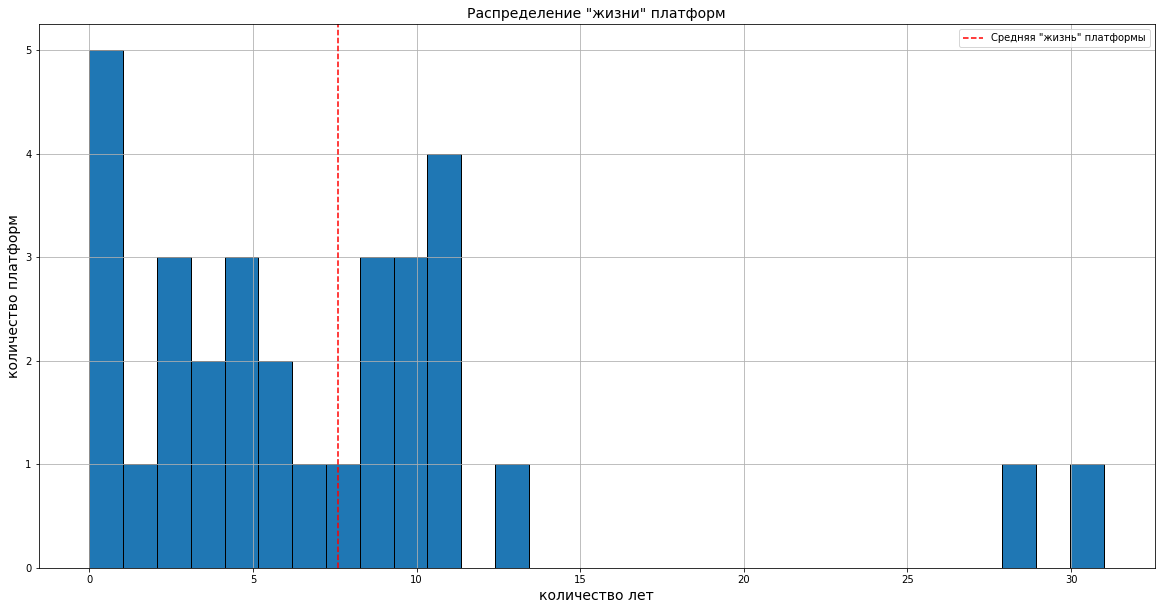

In [21]:
# Расчет минимального и максимального года выпуска для каждой платформы
platforms_lifespan = df.groupby("platform")["year_of_release"].agg(["min", "max"]).reset_index()

# Вычисление "жизни" платформы как разницы между максимальным и минимальным годом выпуска
platforms_lifespan["lifespan"] = platforms_lifespan["max"] - platforms_lifespan["min"]

# Вычисление средней "жизни" платформы
average_lifespan = platforms_lifespan["lifespan"].mean()

# Создание графика распределения "жизни" платформ
plt.figure(figsize=(20, 10))
plt.hist(platforms_lifespan["lifespan"], bins=30, edgecolor='black')

# Настройка осей и заголовка графика
plt.title('Распределение "жизни" платформ', fontsize=14)
plt.xlabel("количество лет", fontsize=14)
plt.ylabel("количество платформ", fontsize=14)
plt.grid(True)

# Вывод средней "жизни" платформы
plt.axvline(x=average_lifespan, color='r', linestyle='--', label='Средняя "жизнь" платформы')
plt.legend()

# Выводим график
plt.show()

**Вывод:**

- по первой гистограмме можно сделать вывод что пиковые значения были с 2005 по 2010 годы. Гистограмма была построена на основе топа 10 платформ сс наибольшим и суммарными продажами:
1. PS2     2127
2. DS      2121
3. PS3     1306
4. Wii     1286
5. X360    1232
6. PSP     1193
7. PS      1190
8. PC       957
9. GBA      811
10. XB       803

- по второй гистограмме можно сделать вывод что платформы "живут" от 0-10 лет при этом пиковые значения на отметке меньше года.

**3.3 Прогноз на 2017 год, опираясь на данные пункта 3.2**

На основании предоставленных выше данных можно определить актуальный период для построения прогноза на 2017 год. 

Основываясь на предыдущем исследовании, можно предположить, что актуальный период для построения прогноза на 2017 год составляет примерно 2-3 года, то есть данные за 2014-2016 годы. В этот период было заметно увеличение количества выпускаемых игр и общего объема рынка видеоигр.

Таким образом, для прогноза на 2017 год рекомендуется использовать данные за 2014-2016 годы, так как они отражают более актуальную ситуацию на рынке видеоигр и лучше подходят для выявления текущих трендов и популярных платформ.

**3.4 Какие платформы лидируют по продажам, растут или падают?**

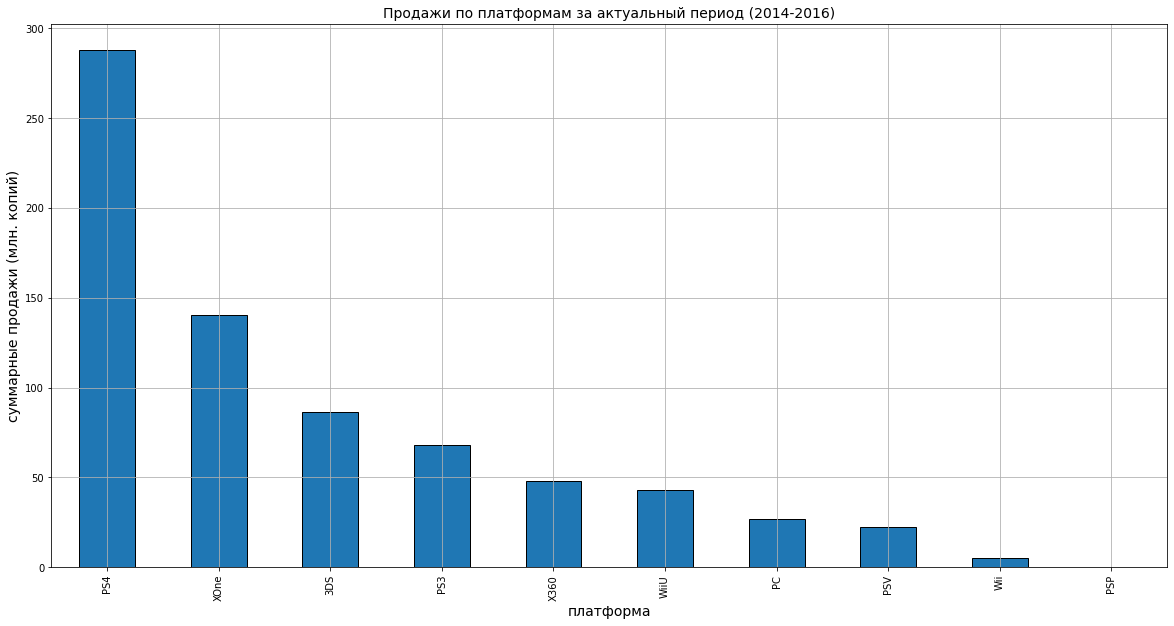

In [22]:
# Выбираем данные за актуальный период
actual_period_data = df[df['year_of_release'].between(2014, 2016)]

# Группируем данные по платформам и считаем суммарные продажи
platform_sales = actual_period_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(20, 10))
platform_sales.plot(kind='bar', edgecolor='black', grid=True)
plt.title('Продажи по платформам за актуальный период (2014-2016)', fontsize=14)
plt.xlabel('платформа', fontsize=14)
plt.ylabel('суммарные продажи (млн. копий)', fontsize=14)
plt.show()

**По данным за актуальный период (2014-2016 годы) можно сделать следующие выводы:**

1. Лидерами по продажам являются платформы PS4, XOne и 3DS. У них самые высокие суммарные продажи среди всех платформ.

2. Платформы PS4 и XOne показывают положительную динамику продаж, так как они имеют высокие объемы продаж и лидеры по продажам в актуальном периоде.

3. 3DS также имеет значительные продажи и может быть потенциально прибыльной платформой.

4. Платформы WiiU, PS3, X360, Wii, PC, PSV и PSP имеют меньшую долю продаж, что может свидетельствовать о том, что их продажи скорее всего падают.

**3.5 Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам**

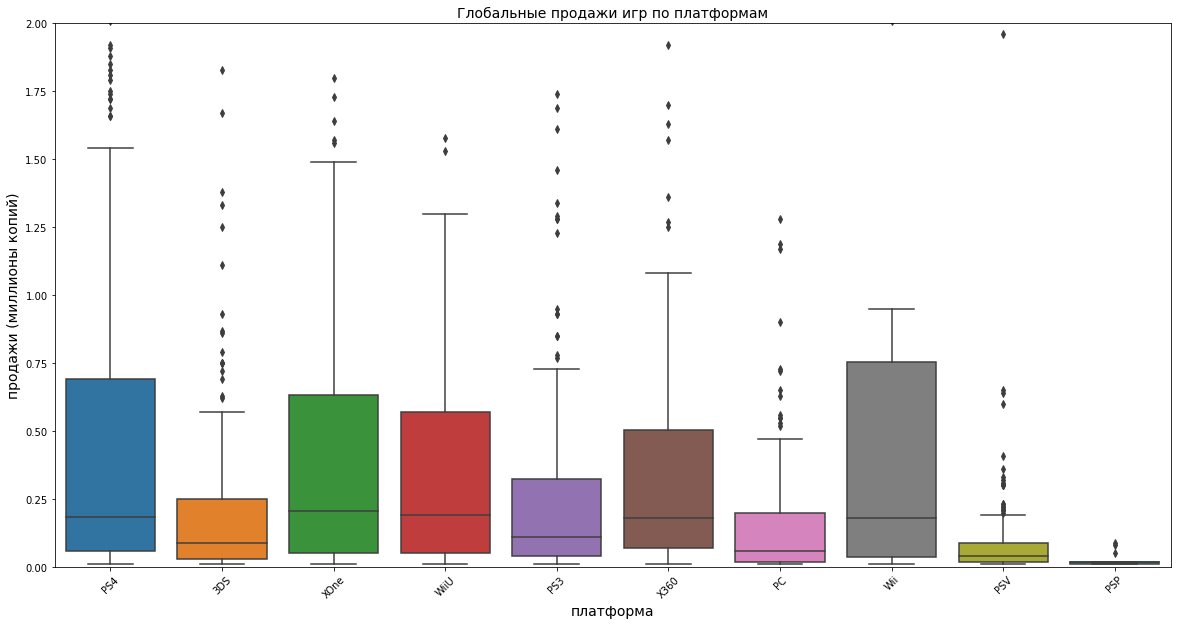

In [23]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=actual_period_data, x='platform', y='total_sales')
plt.xticks(rotation=45)
plt.title('Глобальные продажи игр по платформам', fontsize=14)
plt.xlabel('платформа', fontsize=14)
plt.ylabel('продажи (миллионы копий)', fontsize=14)
plt.ylim(0, 2)
plt.show()

**После построения графика «ящик с усами» можно сделать следующие выводы:**

1. На графике видны платформы с наиболее высокими глобальными продажами, такие как PS4, XOne, PS3, Wii и WiiU.
2. По графику можно сделать вывод о различиях в продажах между платформами. Например, некоторые платформы могут иметь большую медиану продаж, но также иметь большое количество выбросов, что указывает на наличие успешных игр на этой платформе.
3. График позволяет оценить разброс продаж на разных платформах и выявить потенциально прибыльные платформы с наиболее стабильными продажами и меньшим количеством выбросов.

**3.6 Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами**

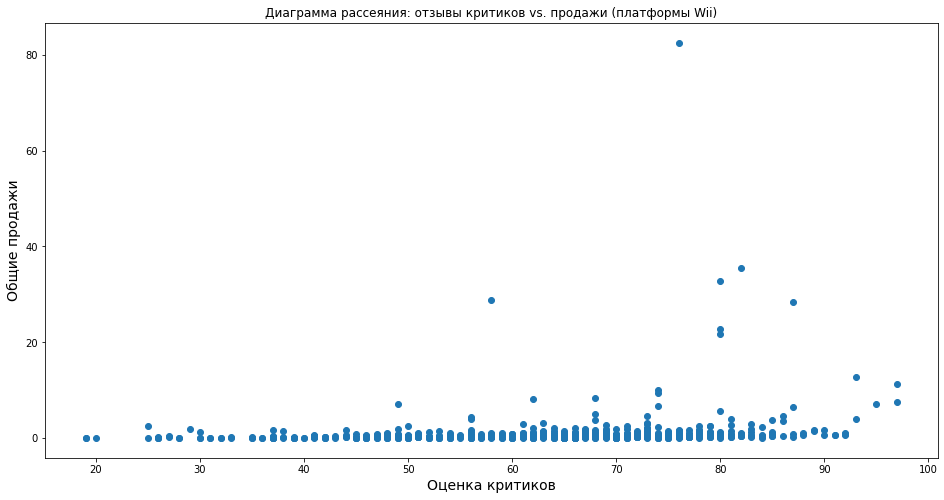

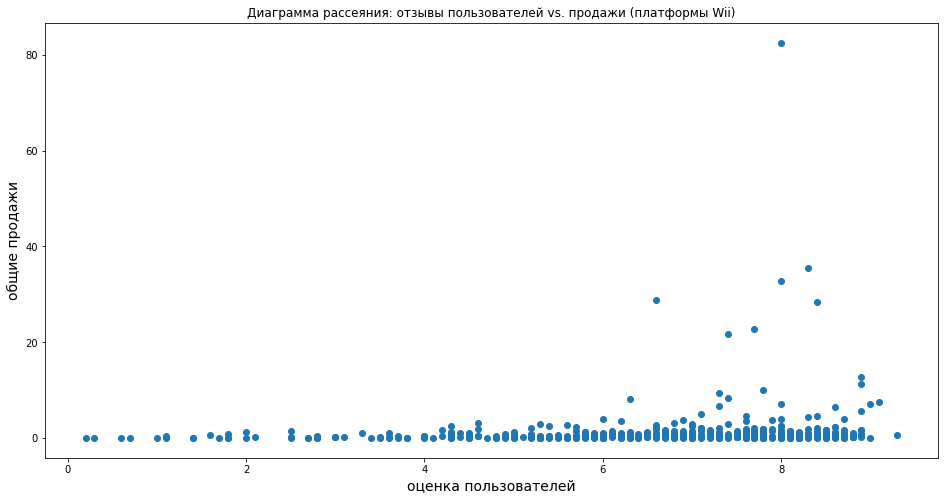

Коэффициент корреляции между оценкой критиков и продажами: 0.17790728577594922
Корреляция между оценками пользователей и продажами: 0.11283121360773787


In [24]:
# Фильтрация данных для платформы Wii
wii_df = df[df['platform'] == 'Wii']

# Построение диаграммы рассеяния
plt.figure(figsize=(16, 8))
plt.scatter(wii_df['critic_score'], wii_df['total_sales'])
plt.xlabel('Оценка критиков', fontsize=14)
plt.ylabel('Общие продажи', fontsize=14)
plt.title('Диаграмма рассеяния: отзывы критиков vs. продажи (платформы Wii)')
plt.show()

# Построение диаграммы рассеяния
plt.figure(figsize=(16, 8))
plt.scatter(wii_df['user_score'], wii_df['total_sales'])
plt.xlabel('оценка пользователей', fontsize=14)
plt.ylabel('общие продажи', fontsize=14)
plt.title('Диаграмма рассеяния: отзывы пользователей vs. продажи (платформы Wii)')
plt.show()

# Вычисление корреляции
correlation_critic = wii_df['critic_score'].corr(wii_df['total_sales'])
correlation_user = wii_df['user_score'].corr(wii_df['total_sales'])

print("Коэффициент корреляции между оценкой критиков и продажами:", correlation_critic)
print("Корреляция между оценками пользователей и продажами:", correlation_user)

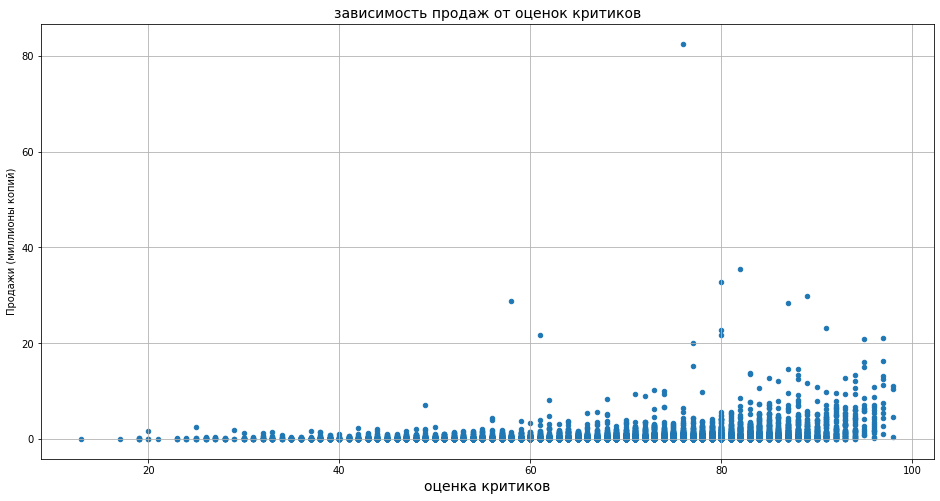

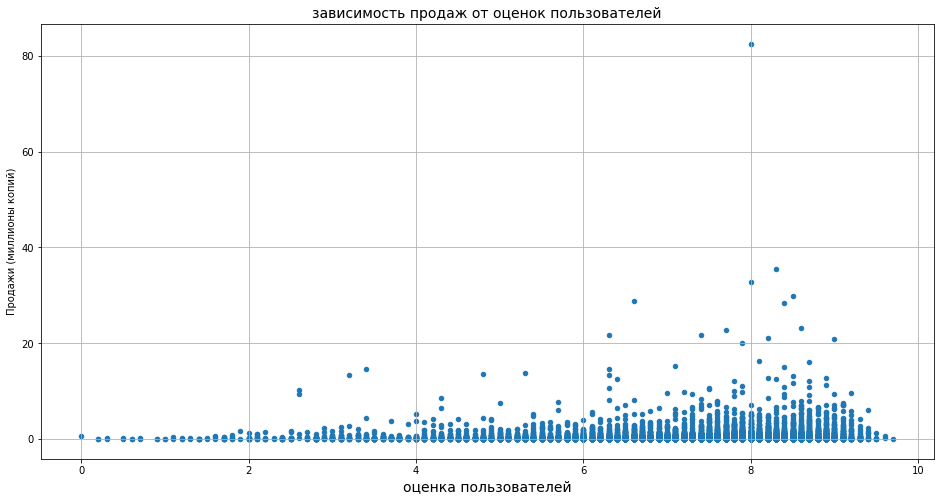

Корреляция между оценками критиков и продажами: 0.24534884547411373
Корреляция между оценками пользователей и продажами: 0.08798399271321646


In [25]:
df.plot(x="critic_score", y="total_sales", kind="scatter", grid=True, figsize=(16, 8))
plt.title('зависимость продаж от оценок критиков', fontsize=14)
plt.xlabel('оценка критиков', fontsize=14)
plt.ylabel('Продажи (миллионы копий)')
plt.show()

df.plot(x="user_score", y="total_sales", kind="scatter", grid=True, figsize=(16, 8))
plt.title('зависимость продаж от оценок пользователей', fontsize=14)
plt.xlabel('оценка пользователей', fontsize=14)
plt.ylabel('Продажи (миллионы копий)')
plt.show()

correlation_critic = df['critic_score'].corr(df['total_sales'])
correlation_user = df['user_score'].corr(df['total_sales'])

print("Корреляция между оценками критиков и продажами:", correlation_critic)
print("Корреляция между оценками пользователей и продажами:", correlation_user)

**Вывод по оценкам критиков и пользователей платформы Wii и всех платформ:**

Коэффициент корреляции между оценкой критиков и продажами: 0.17790728577594922
Корреляция между оценками пользователей и продажами: 0.11283121360773787

Для платформы Wii коэффициент корреляции между оценкой критиков и продажами составляет 0.1779, а корреляция между оценками пользователей и продажами равна 0.1128. Оба значения весьма низкие, что означает слабую положительную связь между оценками и продажами игр на платформе Wii.

В то же время, для всех платформ в целом коэффициент корреляции между оценками критиков и продажами составляет 0.2453, а корреляция между оценками пользователей и продажами равна 0.0879. Это также указывает на слабое влияние оценок на продажи игр на всех платформах.

Таким образом, на платформе Wii и на других платформах оценки пользователей и критиков оказывают незначительное влияние на продажи игр. Другие факторы, такие как маркетинг, популярность жанра игры, наличие конкурентов и другие внешние факторы, могут в большей степени влиять на продажи игр на различных платформах.

**3.7 Посмотрим на общее распределение игр по жанрам. Рассмотрим самые прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

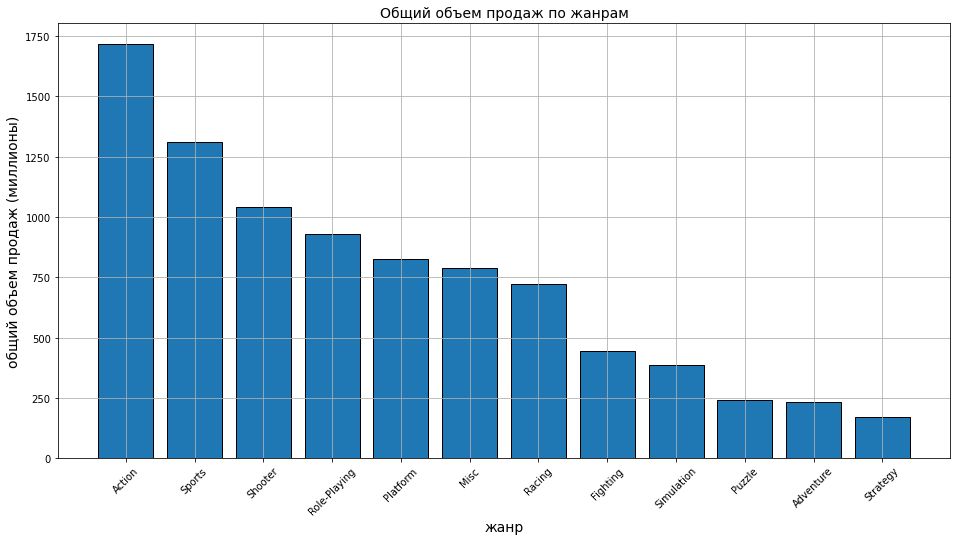

In [26]:
genre_sales = df.groupby('genre')['total_sales'].sum().reset_index()
genre_sales = genre_sales.sort_values('total_sales', ascending=False)

plt.figure(figsize=(16, 8))
plt.bar(genre_sales['genre'], genre_sales['total_sales'], edgecolor='black')
plt.xlabel('жанр', fontsize=14)
plt.ylabel('общий объем продаж (миллионы)', fontsize=14)
plt.title('Общий объем продаж по жанрам', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [27]:
genre_mean_sales = df.groupby('genre')['total_sales'].mean()
genre_median_sales = df.groupby('genre')['total_sales'].median()

print(f"Медианные значение глобальных продаж игр по жанрам {genre_median_sales}")
print(f"Среднее значение глобальных продаж игр по жанрам {genre_mean_sales}")

Медианные значение глобальных продаж игр по жанрам genre
Action          0.19
Adventure       0.05
Fighting        0.21
Misc            0.16
Platform        0.27
Puzzle          0.10
Racing          0.19
Role-Playing    0.18
Shooter         0.24
Simulation      0.15
Sports          0.22
Strategy        0.10
Name: total_sales, dtype: float64
Среднее значение глобальных продаж игр по жанрам genre
Action          0.519057
Adventure       0.180456
Fighting        0.528865
Misc            0.459204
Platform        0.940262
Puzzle          0.421599
Racing          0.590122
Role-Playing    0.628683
Shooter         0.803519
Simulation      0.452695
Sports          0.567940
Strategy        0.256419
Name: total_sales, dtype: float64


Из предоставленного распределения продаж по жанрам можно сделать следующие выводы:

1) Самым прибыльным жанром, согласно медианному значению продаж, является "Platform" с медианной продажей в размере 0.27 миллионов копий.
2) Среди жанров с максимальным средним значением продаж лидирует жанр "Shooter" со средним значением продаж в размере 0.803519 миллионов копий.
3) Жанр "Role-Playing" имеет второе наивысшее среднее значение продаж - 0.628683 миллионов копий.
4) Жанр "Sports" занимает третье место по среднему значению продаж с 0.567940 миллионами копий.
5) Отмечается, что жанры "Action", "Fighting", "Misc" и "Racing" также имеют относительно высокие средние значения продаж.

Таким образом, анализ медианных и средних значений продаж подтверждает выводы, сделанные на основе общих продаж. Жанры "Platform", "Shooter", "Role-Playing" и "Sports" всё равно являются наиболее прибыльными жанрами, с высокими продажами относительно других жанров.

# 4. Портрет пользователя каждого региона

**4.1 Составление портрета пользователя *Северной Америки***

In [28]:
# Самые популярные платформы в Северной Америке
na_platform_sales = df.groupby('platform')['na_sales'].sum().reset_index()
na_platform_sales = na_platform_sales.sort_values('na_sales', ascending=False).head(5)
na_platform_sales

,platform,na_sales
28,X360,595.74
16,PS2,572.92
26,Wii,486.87
17,PS3,390.13
4,DS,380.31


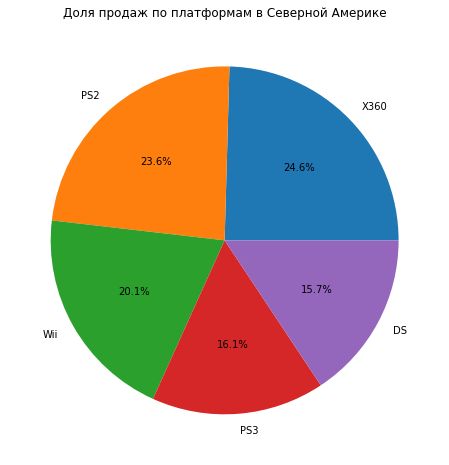

In [29]:
# Построим кругову диаграмму топ 5 платформ по продажам в Северной Америке
plt.figure(figsize=(8, 8))
plt.pie(na_platform_sales['na_sales'], labels=na_platform_sales['platform'], autopct='%1.1f%%')
plt.title('Доля продаж по платформам в Северной Америке')
plt.show()

In [30]:
# Самые популярные жанры в Северной Америке
na_top_genre = df.groupby('genre')['na_sales'].sum().reset_index()
na_top_genre = na_top_genre.sort_values('na_sales', ascending=False).head(5)
na_top_genre

,genre,na_sales
0,Action,863.17
10,Sports,671.20
8,Shooter,584.83
4,Platform,444.44
3,Misc,399.57


In [31]:
# Cредние продажи игр в Северной Америке рейтинга ESRB
rating_sales_na = df.groupby('rating')['na_sales'].mean().reset_index()
rating_sales_na

,rating,na_sales
0,AO,1.260000
1,E,0.324978
2,E10+,0.248026
3,EC,0.191250
4,K-A,0.853333
5,M,0.483652
6,RP,0.000000
7,T,0.257349
8,unknown,0.183830


**4.2 Составление портрета пользователя *Европы***

In [32]:
# Самые популярные платформы в Европе
eu_platform_sales = df.groupby('platform')['eu_sales'].sum().reset_index()
eu_platform_sales = eu_platform_sales.sort_values('eu_sales', ascending=False).head(5)
eu_platform_sales

,platform,eu_sales
16,PS2,332.63
17,PS3,327.21
28,X360,268.32
26,Wii,258.32
15,PS,212.39


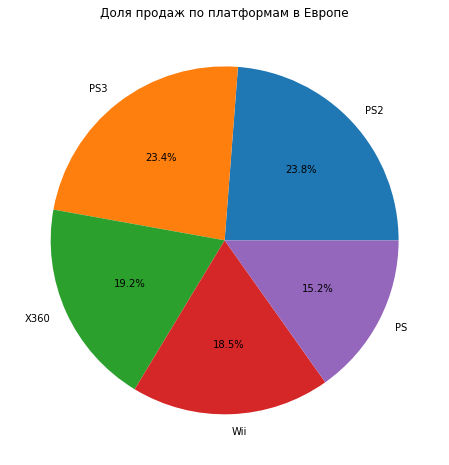

In [33]:
# Построим круговую диаграмму топ 5 платформ по продажам в Европе
plt.figure(figsize=(8, 8))
plt.pie(eu_platform_sales['eu_sales'], labels=eu_platform_sales['platform'], autopct='%1.1f%%')
plt.title('Доля продаж по платформам в Европе')
plt.show()

In [34]:
# Самые популярные жанры в Европе
eu_top_genre = df.groupby('genre')['eu_sales'].sum().reset_index()
eu_top_genre = eu_top_genre.sort_values('eu_sales', ascending=False).head(5)
eu_top_genre

,genre,eu_sales
0,Action,510.99
10,Sports,371.33
8,Shooter,314.52
6,Racing,234.49
3,Misc,210.60


In [35]:
# Cредние продажи игр в Европе рейтинга ESRB
rating_sales_eu = df.groupby('rating')['eu_sales'].mean().reset_index()
rating_sales_eu

,rating,eu_sales
0,AO,0.610000
1,E,0.179513
2,E10+,0.131622
3,EC,0.013750
4,K-A,0.090000
5,M,0.312500
6,RP,0.030000
7,T,0.145194
8,unknown,0.091372


**4.2 Составление портрета пользователя *Японии***

In [36]:
# Самые популярные платформы в Японии
jp_platform_sales = df.groupby('platform')['jp_sales'].sum().reset_index()
jp_platform_sales = jp_platform_sales.sort_values('jp_sales', ascending=False).head(5)
jp_platform_sales

,platform,jp_sales
4,DS,175.02
15,PS,139.78
16,PS2,137.54
23,SNES,116.55
2,3DS,100.62


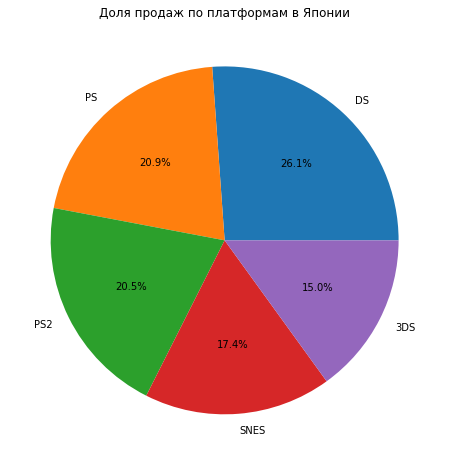

In [37]:
# Построим круговую диаграмму топ 5 платформ по продажам в Японии
plt.figure(figsize=(8, 8))
plt.pie(jp_platform_sales['jp_sales'], labels=jp_platform_sales['platform'], autopct='%1.1f%%')
plt.title('Доля продаж по платформам в Японии')
plt.show()

In [38]:
# Самые популярные жанры в Японии
jp_top_genre = df.groupby('genre')['jp_sales'].sum().reset_index()
jp_top_genre = jp_top_genre.sort_values('jp_sales', ascending=False).head(5)
jp_top_genre

,genre,jp_sales
7,Role-Playing,353.39
0,Action,160.14
10,Sports,134.93
4,Platform,130.71
3,Misc,107.02


In [39]:
# Cредние продажи игр в Японии рейтинга ESRB
rating_sales_jp = df.groupby('rating')['jp_sales'].mean().reset_index()
rating_sales_jp

,rating,jp_sales
0,AO,0.000000
1,E,0.050487
2,E10+,0.028859
3,EC,0.000000
4,K-A,0.486667
5,M,0.041393
6,RP,0.000000
7,T,0.051876
8,unknown,0.125302


**Выводы по четвёртому шагу:**


1. **Самые популярные платформы (топ-5). Различия в долях продаж:**

В **Северной Америке** самые популярные платформы - X360, PS2, Wii, PS3 и DS. Доля продаж X360 составляет 24.6%, PS2 - 23.6%, Wii - 20.1%, PS3 - 16.1% и DS - 15.7%.

В **Европе** самые популярные платформы - PS2, PS3, X360, Wii и PS. Доля продаж PS2 составляет 23.8%, PS3 - 23.4%, X360 - 19.2%, Wii - 18.5% и PS - 15.2%.

В **Японии** самые популярные платформы - DS, PS, PS2, SNES и 3DS. Доля продаж DS составляет 26.1%, PS - 20.9%, PS2 - 20.5%, SNES - 17.4% и 3DS - 15.0%.

Различия в долях продаж связаны с предпочтениями регионов в отношении платформ. Например, в **Северной Америке** наибольшую популярность имеют X360 и PS2, в то время как в **Европе** - PS2 и PS3, а в **Японии** - DS и PS. Это может быть связано с особенностями местного рынка, местными производителями и предпочтениями потребителей в разных регионах.

2. **Самые популярные жанры (топ-5). Разницу регионов по жанрам:**

По результатам анализа предпочтений по жанрам игр в Северной Америке, Европе и Японии можно выделить следующие особенности:

**Северная Америка:**

Action (863.17 млн. копий): Самый популярный жанр, что подчеркивает предпочтение к динамичному и экшн-ориентированному геймплею.

Sports (671.20 млн. копий): Второе место занимают спортивные игры, что может свидетельствовать о высоком интересе к симуляторам спорта в данном регионе.

Shooter (584.83 млн. копий): Стрелялки также популярны, что характерно для многих западных рынков.

**Европа:**

Action (510.99 млн. копий): Как и в Северной Америке, Action лидирует, что свидетельствует о схожести вкусов между этими регионами.

Sports (371.33 млн. копий): Спортивные игры также на втором месте, но их популярность немного ниже, чем в Северной Америке.

Shooter (314.52 млн. копий): Снова стрелялки занимают третье место, подтверждая их популярность на западных рынках.

**Япония:**

Role-Playing (RPG) (353.39 млн. копий): В отличие от Северной Америки и Европы, в Японии самым популярным жанром являются ролевые игры. Японские игры часто известны своими глубокими сюжетами и характерами.

Action (160.14 млн. копий): Action также популярен, но уступает RPG в этом регионе.

Sports (134.93 млн. копий): Спортивные игры находятся на третьем месте, но их популярность заметно меньше, чем в Северной Америке и Европе.

Различия в предпочтениях связаны с культурными и социокультурными особенностями каждого региона. Например, предпочтение RPG в Японии может быть связано с традициями японской игровой индустрии и интересом к нарративным аспектам игр. В то время как в Северной Америке и Европе больший акцент может быть сделан на динамичных и экшн-играх, а также на спортивных симуляторах.

3. **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

Для **Северной Америки**:
- ESRB рейтинг AO (Adults Only) имеет самые большие суммарные продажи - 1.26 млн. копий, что составляет 61% от общих продаж.
- Следом идет рейтинг M (Mature) с суммарными продажами в размере 0.48 млн. копий, что составляет 24% от общих продаж.
- Рейтинг E (Everyone) занимает третье место с суммарными продажами в размере 0.32 млн. копий, что составляет 16% от общих продаж.

Для **Европы**:
- ESRB рейтинг E также имеет самые большие суммарные продажи - 0.18 млн. копий, что составляет 44% от общих продаж.
- Затем идет рейтинг M с суммарными продажами в размере 0.13 млн. копий, что составляет 32% от общих продаж.
- Рейтинг E10+ (Everyone 10 and older) занимает третье место с суммарными продажами в размере 0.13 млн. копий, что составляет 32% от общих продаж.

Для **Японии**:
- ESRB рейтинг K-A (Kids to Adults) имеет самые большие суммарные продажи - 0.48 млн. копий, что составляет 44% от общих продаж.
- Затем идет рейтинг E с суммарными продажами в размере 0.14 млн. копий, что составляет 13% от общих продаж.
- Рейтинг T (Teen) занимает третье место с суммарными продажами в размере 0.14 млн. копий, что составляет 13% от общих продаж.

Исходя из этих данных, можно сделать вывод, что рейтинг ESRB имеет отличия в разных регионах. Например, рейтинг M наиболее популярен в Северной Америке, рейтинг E - в Европе, а рейтинг K-A - в Японии. Это говорит о том, что предпочтения потребителей в отношении рейтинга ESRB могут различаться в разных регионах.

# 5. Проверка гипотез

**5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?**

- Нулевая гипотеза (H0): Средние пользовательские рейтинги для платформ Xbox One и PC одинаковы.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги для платформ Xbox One и PC различаются.

In [40]:
# Подготовим данные
xbox_one_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

# Проведем t-тест
alpha = 0.05
result = ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

# Выведем результаты теста
print(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги различаются.")
else:
    print("Не отвергаем нулевую гипотезу: Нет оснований считать, что средние рейтинги различаются.")

p-value: 4.5385802963771835e-06
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги различаются.


**Критерий:** Для проверки этих гипотез использован t-тест для независимых выборок (ttest_ind) из библиотеки SciPy. Этот критерий применяется, когда мы хотим сравнить средние значения двух независимых групп. В данном случае, две группы - это пользовательские рейтинги для игр на платформах Xbox One и PC.

**Почему использован t-тест?:**

T-тест применяется, когда у нас есть две независимые выборки и мы хотим оценить, есть ли статистически значимое различие между их средними значениями.
В данном контексте, мы используем t-тест, потому что мы сравниваем средние значения двух групп (Xbox One и PC) с целью выяснить, различаются ли они статистически значимо.

**5.2 Средние пользовательские рейтинги жанров Action и Sports разные**

- Нулевая гипотеза (H0): Средние пользовательские рейтинги для жанров Action и Sports одинаковы.
- Альтернативная гипотеза (H1): Средние пользовательские рейтинги для жанров Action и Sports различаются.

In [41]:
# Подготовим данные
action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

# Проведем t-тест
alpha = 0.05
result = ttest_ind(action_scores, sports_scores, equal_var=False)

# Выведем результаты теста
print(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги для жанров Action и Sports различаются.")
else:
    print("Не отвергаем нулевую гипотезу: Нет оснований считать, что средние рейтинги различаются.")

p-value: 0.07370217419278526
Не отвергаем нулевую гипотезу: Нет оснований считать, что средние рейтинги различаются.


**Критерий:** Для проверки этих гипотез можно воспользоваться t-тестом для независимых выборок (ttest_ind) из библиотеки SciPy в Python. Также, установим уровень значимости (alpha) на, например, 0.05.

**Почему использован t-тест?:**

T-тест применяется, когда мы хотим сравнить средние значения двух независимых групп.
В данном случае, мы сравниваем средние пользовательские рейтинги для двух разных жанров (Action и Sports).

# 6. Общий вывод

В ходе исследования были выполнены следующие действия:

1. Подготовлено окружение для анализа данных путем импортирования нужных библиотек.
2. Загружены данные из файла и произведен основной анализ их характеристик.
3. Выполнены необходимые преобразования данных, включая изменение типов, добавление нового столбца и обработку пропущенных значений.
4. Проведен исследовательский анализ, в котором были рассмотрены: сколько игр выпускалось в разные годы? Какие платформы лидируют по продажам? Влияют ли на продажи внутри одной популярной платформы отзывы пользователей и критиков? и тд.
5. Составлены портреты пользователя каждого региона. В портрет вошли: Самые популярные платформы (топ-5), самые популярные жанры (топ-5) и влияние рейтинга ESRB на продажи.
8. Проверены несколько гипотез, связанных с средними пользовательскими рейтингами платформ и средними пользовательскими рейтингами жанров. 
9. Основываясь на полученных результатах исследования, сделаны выводы.

**В ходе проведенного исследования были проверены следующие гипотезы:**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

**Средние пользовательские рейтинги для платформ Xbox One и PC:**

Нулевая гипотеза (H0): Средние пользовательские рейтинги одинаковы.
Альтернативная гипотеза (H1): Средние пользовательские рейтинги различаются.
Результат: Учитывая низкое p-value (4.54e-06), мы отвергаем нулевую гипотезу. Это означает, что существует статистически значимая разница между средними пользовательскими рейтингами для платформ Xbox One и PC. 

**Средние пользовательские рейтинги для жанров Action и Sports:**

Нулевая гипотеза (H0): Средние пользовательские рейтинги одинаковы.
Альтернативная гипотеза (H1): Средние пользовательские рейтинги различаются.
Результат: Учитывая значение p-value (0.07), которое превышает обычный уровень значимости 0.05, у нас нет достаточных оснований для отвержения нулевой гипотезы. Это означает, что нет статистически значимых различий в средних пользовательских рейтингах для жанров Action и Sports.

Различие в средних пользовательских рейтингах между платформами может свидетельствовать о том, что игроки имеют разные предпочтения или восприятие качества игр на этих платформах. Важно учитывать, что статистическая значимость не всегда означает практическую значимость.
Средние пользовательские рейтинги для жанров Action и Sports:

Так как у нас нет статистически значимых различий, это может подразумевать, что пользовательские предпочтения по средним рейтингам для жанров Action и Sports схожи. Однако, важно отметить, что значение p-value (0.07) близко к уровню значимости 0.05, и небольшие изменения в данных могут повлиять на результаты.

**Итак, основные выводы и рекомендации для бизнеса:**

- Следует тщательно анализировать тренды индустрии, учитывая изменения в предпочтениях пользователей, выход новых платформ и конкурентное окружение.
- При планировании рекламных кампаний стоит ориентироваться на популярные платформы и жанры, а также учесть региональные особенности.
- Качество игрового контента, оцененное критиками, может существенно повлиять на коммерческий успех, поэтому важно уделять внимание разработке высококачественных игр.
- Следует следить за изменениями в возрастных предпочтениях игроков и адаптировать контент под соответствующие рейтинги ESRB.

Эти рекомендации позволят магазину "Стримчик" оптимизировать свой ассортимент, сфокусироваться на наиболее перспективных рынках и повысить эффективность маркетинговых кампаний.